<a href="https://colab.research.google.com/github/rjanow/Masterarbeit/blob/main/1_EDA_and_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting UVI with LSTMs

[Notebook 1: EDA and Cleaning](./1_EDA and Cleaning.ipynb)

[Notebook 2: Modeling and Predictions](./2_Modeling and Predictions.ipynb)

[Notebook 3: Technical Report](./3_Technical_Report.ipynb)

In deiesem Notebook werden die aufgezeichenten UVI-Messungen weiter verarbeitet und für das Training vorbereitet.


- Einlesen der UVI-Werte
- Ersetzen von fehlenden Messwerten

- Einlesen der weiteren Inputwerte
- EDA (exploratory data analysis)

In [87]:
## import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime
from datetime import timedelta

import matplotlib
import seaborn as sns

from google.colab import drive

In [ ]:
# Verbinden mit der Google-Drive
drive.mount('/content/drive')

In [24]:
# Pfad zur CSV-Datei auf Google Drive
drive_path = '/content/drive/My Drive/Colab_Notebooks/CSV_UVI/'

# Import der Messdaten

Die Messdaten sind in einer CSV-Datei gespeichert, diese muss importiert werden.

In [27]:
## Code zum Import der Messdaten
file_list = ['22.06', '22.07']  # Hier wird angegeben, welche Monate importiert werden sollen
dataframes = []

for filename in file_list:
    file_path = drive_path + filename
    df_import = pd.read_csv(file_path)
    dataframes.append(df_import)

df_UVI_combined = pd.concat(dataframes, ignore_index=True)

In [50]:
# Spaltennamen des Dataframe ausgeben
df_UVI_combined.columns

Index(['Datetime', 'Datum', 'Uhrzeit', 'Messzeitpunkt', 'erythem', 'UVI'], dtype='object')

In [ ]:
# Dataframe ausgeben
df_UVI_combined

# Erstes Plotten der Messdaten

In [99]:
# Funktion zum Plotten aller Messdaten
def plot_data_per_day(dataframe, date_column, value_column, x_column, dates, save_path):
    for date in dates:
        subset = dataframe[dataframe[date_column] == date]

        plt.figure(figsize=(10, 6))
        ax = sns.lineplot(data=subset, x=x_column, y=value_column)

        #interval = 2  # Intervall in Stunden
        #ax.xaxis.set_major_locator(mdates.HourLocator(interval=interval))

        plt.xticks(rotation=45)
        plt.title(f'Verlauf des UVI für den {date}')
        plt.xlabel('Uhrzeit (UTC)')
        plt.ylabel('UVI')
        plt.tight_layout()
        # plt.show()

        plot_filename = f'{date}.png'
        plot_filepath = save_path + plot_filename
        plt.savefig(plot_filepath)  # Plot speichern
        plt.close()  # Plot schließen, um Ressourcen freizugeben

In [58]:
# Funktion zum Erzeugen einer Liste mit Daten die geplottet werden sollen
def generate_dates_to_plot(start_date, end_date):
    date_range = []
    current_date = start_date

    while current_date <= end_date:
        date_range.append(current_date.strftime('%Y-%m-%d'))
        current_date += timedelta(days=1)

    return date_range

In [63]:
# Erzeugen einer Liste mit Daten
start_date = datetime(2022, 6, 15)
end_date = datetime(2022, 6, 15)

dates_to_plot = generate_dates_to_plot(start_date, end_date)

In [60]:
# Speicherort für die Plots der täglichen Messdaten
daily_plots_path = '/content/drive/My Drive/Colab_Notebooks/plot_daily_UVI/'

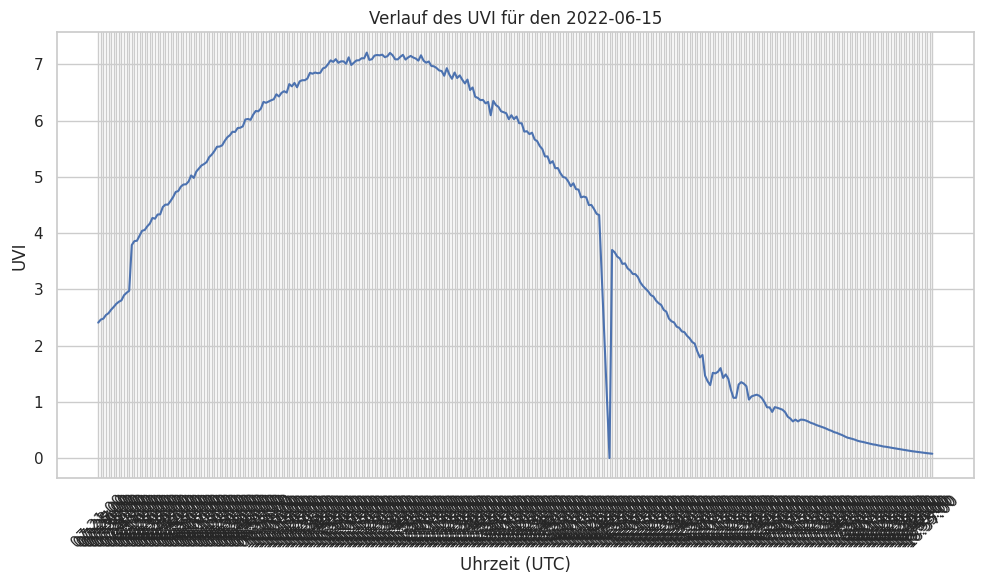

In [100]:
# Funktion zum Plotten der Messdaten aufrufen
plot_data_per_day(df_UVI_combined, 'Datum', 'UVI', 'Uhrzeit', dates_to_plot, daily_plots_path)

# Bereinigen der Messdaten

Hier wird erklärt, was zum Bereinigen der Messdaten getan werden muss.

- Fehlende Messtage müssen ersetzt werden
- Outliers müssen ersetzt werden

In [97]:
# Finden von NAN Einträgen in den Messdaten
nan_count = df_UVI_combined['UVI'].isna().sum()

In [98]:
nan_count

11

# Plotten von Zusammenhängen in den Messdaten

In [ ]:
## Code zum Plotten von Zusammenhängen in den Messdaten

# Daten zu "pickel" speichern

https://docs.python.org/3/library/pickle.html

 - The pickle module implements binary protocols for serializing and de-serializing a *Python object structure*. “Pickling” is the process whereby a *Python object hierarchy is converted into a byte stream*, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling".

In [ ]:
## Code um Messdaten zu pickel zu speichern